decomposing video to frames this may take a while  for large videos :) .....
decomposition complete
Runtime of the program is 0.14167451858520508
(60, 80, 3)
1
2
5.279066479806567
(60, 80, 3)
2
3
4.37726563952334
(60, 80, 3)
3
4
0.31341671390977566
(60, 80, 3)
4
5
2.424922766172899
(60, 80, 3)
5
6
0.273261078698485
(60, 80, 3)
6
7
0.12345169593197354
(60, 80, 3)
7
8
4.4697906936836524
(60, 80, 3)
8
9
1.0656346840123998
(60, 80, 3)
9
10
0.35407588963300024
(60, 80, 3)
10
11
2.5266059117440594
(60, 80, 3)
11
12
0.26061910821402484
(60, 80, 3)
12
13
2.9958093445401537
(60, 80, 3)
13
14
0.28088346527704067
(60, 80, 3)
14
15
3.990057215720057
(60, 80, 3)
15
16
0.05249464854234332
(60, 80, 3)
16
17
0.2702712590562466
(60, 80, 3)
17
18
0.06821990102762446
(60, 80, 3)
18
19
3.867105190328444
(60, 80, 3)
19
20
2.3371750717872035
(60, 80, 3)
20
21
1.1658840393758023
(60, 80, 3)
21
22
0.056236002983683676
(60, 80, 3)
22
23
0.30013842192686857
(60, 80, 3)
23
24
2.2391755584095008
(60, 80, 3)
24
25

No handles with labels found to put in legend.


239
240
0.3580087536802407
1.0
[0.800057   0.66338661 0.04749916 0.3675037  0.04141347 0.01870944
 0.67740904 0.16149986 0.05366117 0.38291405 0.03949754 0.45402312
 0.04256866 0.60470411 0.00795571 0.04096035 0.01033891 0.5860704
 0.35420529 0.17669292 0.00852272 0.0454868  0.3393532  0.08964341
 0.38745321 0.03992253 0.02604563 0.04253677 0.52130841 0.05162065
 0.39486107 0.27023453 0.00681217 0.05079243 0.03963582 0.45989518
 0.04522347 0.32806777 0.01057636 0.27514577 0.03879233 0.05419648
 0.34058122 0.16974712 0.00902665 0.37144314 0.02685805 0.47751556
 0.02892451 0.60044106 0.00698332 0.03322511 0.01130068 0.77513178
 0.03416694 0.40942268 0.00613796 0.46762968 0.05292564 0.09247874
 0.69664975 0.03763857 0.0042076  0.44971876 0.04378483 0.43852795
 0.53573347 0.1467227  0.00716343 0.05142689 0.10104411 0.52909464
 0.3370314  0.04268127 0.01339855 0.29604296 0.04230997 0.02942772
 0.39423173 0.14115987 0.00966444 0.35411061 0.03921004 0.36366669
 0.40704071 0.27613866 0.0100035

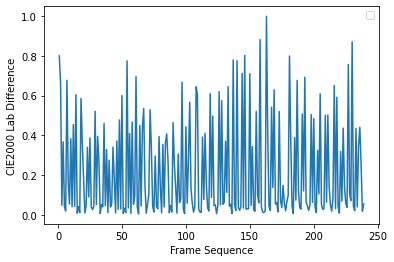

In [26]:
##DECOMPOSITION of video frames 14/03/2021
import sys
import shutil

import numpy as np
from math import floor
import pandas as pd
import numpy as np
import cv2

import os
import time
from PIL import Image
import math

# command line arguments --> file name, video_file_name, gpu or cpu 


# first decompose the video to frames
# place the video to be detected into the directory


#video = sys.argv[1]
#pred_text_file_name = sys.argv[2]

# resize image
#output = cv2.resize(src, dsize)


start = time.time()
text_file = 'frames.txt'

print('decomposing video to frames this may take a while  for large videos :) .....')
frames_path = 'video_frames/'
os.makedirs('video_frames/', exist_ok=True)
#os.makedirs('predictions/', exist_ok=True)

f = open(text_file, 'w+')
# Opens the Video file
cap= cv2.VideoCapture('/content/v_Biking_g02_c02.avi')
i=1
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == False:
        break
    scale_percent = 25

#calculate the 50 percent of original dimensions
    width = int(frame.shape[1] * scale_percent / 100)
    height = int(frame.shape[0] * scale_percent / 100)

# dsize
    dsize = (width, height)

    output = cv2.resize(frame, dsize) 
    frame_path = frames_path + 'frame_' + str(i) + '.jpg'
    cv2.imwrite("/content/video_frames/frame_"+ str(i) + ".jpg", output)
    f.write(frame_path + '\n')
    i+=1

cap.release()
cv2.destroyAllWindows()
print("decomposition complete")

end = time.time()
# total time taken
print(f"Runtime of the program is {end - start}")
count_frame = i

#CIEDE2000 frame sequence difference 14/03/2021 ORIGINAL PAPER
import cv2
import numpy as np
from skimage import color
#from ciede2000 import CIEDE2000
import math
import time
from matplotlib import pyplot as plt
import numpy as np

def CIEDE2000(Lab_1, Lab_2):
    '''Calculates CIEDE2000 color distance between two CIE L*a*b* colors'''
    C_25_7 = 6103515625 # 25**7
    
    L1, a1, b1 = Lab_1[0], Lab_1[1], Lab_1[2]
    L2, a2, b2 = Lab_2[0], Lab_2[1], Lab_2[2]
    C1 = math.sqrt(a1**2 + b1**2)
    C2 = math.sqrt(a2**2 + b2**2)
    C_ave = (C1 + C2) / 2
    G = 0.5 * (1 - math.sqrt(C_ave**7 / (C_ave**7 + C_25_7)))
    
    L1_, L2_ = L1, L2
    a1_, a2_ = (1 + G) * a1, (1 + G) * a2
    b1_, b2_ = b1, b2
    
    C1_ = math.sqrt(a1_**2 + b1_**2)
    C2_ = math.sqrt(a2_**2 + b2_**2)
    
    if b1_ == 0 and a1_ == 0: h1_ = 0
    elif a1_ >= 0: h1_ = math.atan2(b1_, a1_)
    else: h1_ = math.atan2(b1_, a1_) + 2 * math.pi
    
    if b2_ == 0 and a2_ == 0: h2_ = 0
    elif a2_ >= 0: h2_ = math.atan2(b2_, a2_)
    else: h2_ = math.atan2(b2_, a2_) + 2 * math.pi

    dL_ = L2_ - L1_
    dC_ = C2_ - C1_    
    dh_ = h2_ - h1_
    if C1_ * C2_ == 0: dh_ = 0
    elif dh_ > math.pi: dh_ -= 2 * math.pi
    elif dh_ < -math.pi: dh_ += 2 * math.pi        
    dH_ = 2 * math.sqrt(C1_ * C2_) * math.sin(dh_ / 2)
    
    L_ave = (L1_ + L2_) / 2
    C_ave = (C1_ + C2_) / 2
    
    _dh = abs(h1_ - h2_)
    _sh = h1_ + h2_
    C1C2 = C1_ * C2_
    
    if _dh <= math.pi and C1C2 != 0: h_ave = (h1_ + h2_) / 2
    elif _dh  > math.pi and _sh < 2 * math.pi and C1C2 != 0: h_ave = (h1_ + h2_) / 2 + math.pi
    elif _dh  > math.pi and _sh >= 2 * math.pi and C1C2 != 0: h_ave = (h1_ + h2_) / 2 - math.pi 
    else: h_ave = h1_ + h2_
    
    T = 1 - 0.17 * math.cos(h_ave - math.pi / 6) + 0.24 * math.cos(2 * h_ave) + 0.32 * math.cos(3 * h_ave + math.pi / 30) - 0.2 * math.cos(4 * h_ave - 63 * math.pi / 180)
    
    h_ave_deg = h_ave * 180 / math.pi
    if h_ave_deg < 0: h_ave_deg += 360
    elif h_ave_deg > 360: h_ave_deg -= 360
    dTheta = 30 * math.exp(-(((h_ave_deg - 275) / 25)**2))
    
    R_C = 2 * math.sqrt(C_ave**7 / (C_ave**7 + C_25_7))  
    S_C = 1 + 0.045 * C_ave
    S_H = 1 + 0.015 * C_ave * T
    
    Lm50s = (L_ave - 50)**2
    S_L = 1 + 0.015 * Lm50s / math.sqrt(20 + Lm50s)
    R_T = -math.sin(dTheta * math.pi / 90) * R_C

    k_L, k_C, k_H = 1, 1, 1
    
    f_L = dL_ / k_L / S_L
    f_C = dC_ / k_C / S_C
    f_H = dH_ / k_H / S_H
    
    dE_00 = math.sqrt(f_L**2 + f_C**2 + f_H**2 + R_T * f_C * f_H)
    return dE_00
#start time
start = time.time()
frame = []
labdiff = []
for k in range(1,(count_frame-1)):
  image1 = cv2.imread("/content/video_frames/frame_"+ str(k) + ".jpg")
  image2 = cv2.imread("/content/video_frames/frame_"+ str(k+1) + ".jpg")
  image1 = np.float32(image1)
  image1 *= 1./255
  image2 = np.float32(image2)
  image2 *= 1./255

  Lab1 = cv2.cvtColor(image1, cv2.COLOR_BGR2Lab)
  print(Lab1.shape)
  Lab2 = cv2.cvtColor(image2, cv2.COLOR_BGR2Lab)


  L1, a1, b1 = cv2.split(Lab1)
  L2, a2, b2 = cv2.split(Lab2)

#print(np.mean(L1))
#print(a1)
  diff = 0
  for i in range(0,Lab1.shape[0]):
    for j in range(0,Lab1.shape[1]):
      diff = diff + CIEDE2000((L1[i][j], a1[i][j], b1[i][j]), (L2[i][j], a2[i][j], b2[i][j]))
    #print(CIEDE2000((L1[i][j], a1[i][j], b1[i][j]), (L2[i][j], a2[i][j], b2[i][j])))
  print(k)
  print(k+1)
  print(diff/(60*88*3))
  frame.append(k)
  labdiff.append(diff/(60*88*3))
#print(CIEDE2000((50, 2.6772, -79.7751), (50, 0.0000, -82.7485)))


#plt.plot([0.1, 0.2, 0.3, 0.4], [1, 2, 3, 4])
#plt.plot([0.1, 0.2, 0.3, 0.4], [1, 4, 9, 16])
frame = np.array(frame)
labdiff = np.array(labdiff)#*(240*352*3)
labdiff = labdiff/max(labdiff)
print(max(labdiff))
print(labdiff)
plt.plot(frame, (labdiff))#, label='CIEDE2000 Lab Difference')
plt.xlabel("Frame Sequence")
plt.ylabel("CIE2000 Lab Difference")
plt.legend()
#plt.savefig('labdiff.jpeg')
#print(labdiff[11732]*3)
#print(labdiff[11733]*3)
#print(labdiff[11734]*3)

ab_cut = []
ab_cut.append(1)
deli = 0.22
#labdiff = labdiff*max(labdiff)
for i in range(2,len(frame)-1):
  if(labdiff[i] > deli):
    if(labdiff[i-1] < deli):
      if(labdiff[i+1] < deli):
        ab_cut.append(i)

  

print(len(ab_cut))
print(ab_cut)
#ab_cut = np.array(ab_cut)
#print(ab_cut)
#print(ab_cut[0])




# end time
end = time.time()

# total time taken
print(f"Runtime of the program is {end - start}")

shutil.rmtree("/content/video_frames")



In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["axes.grid"] = False
import glob
import cv2
import os

from sklearn.cluster import KMeans, spectral_clustering
from sklearn.metrics import silhouette_score, pairwise_distances_argmin_min
from scipy.signal import find_peaks

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

import tensorflow as tf


video_id = 'Biking'
video = '/content/v_Biking_g02_c01.avi'
video_capture = cv2.VideoCapture(video)
currentframe = 0
try: 
  if not os.path.exists(f'data/frames/{video_id}'): 
    os.makedirs(f'data/frames/{video_id}') 
except OSError: 
  print ('Error: Creating directory of data')
while(True): 
  ret, frame = video_capture.read() 
  if ret: 
    name = f'data/frames/{video_id}/' + str(currentframe) + '.jpg'
    print ('Creating...' + name) 
    cv2.imwrite(name, frame) 
    currentframe += 1
  else: 
    break
video_capture.release() 
cv2.destroyAllWindows()



Creating...data/frames/Biking/0.jpg
Creating...data/frames/Biking/1.jpg
Creating...data/frames/Biking/2.jpg
Creating...data/frames/Biking/3.jpg
Creating...data/frames/Biking/4.jpg
Creating...data/frames/Biking/5.jpg
Creating...data/frames/Biking/6.jpg
Creating...data/frames/Biking/7.jpg
Creating...data/frames/Biking/8.jpg
Creating...data/frames/Biking/9.jpg
Creating...data/frames/Biking/10.jpg
Creating...data/frames/Biking/11.jpg
Creating...data/frames/Biking/12.jpg
Creating...data/frames/Biking/13.jpg
Creating...data/frames/Biking/14.jpg
Creating...data/frames/Biking/15.jpg
Creating...data/frames/Biking/16.jpg
Creating...data/frames/Biking/17.jpg
Creating...data/frames/Biking/18.jpg
Creating...data/frames/Biking/19.jpg
Creating...data/frames/Biking/20.jpg
Creating...data/frames/Biking/21.jpg
Creating...data/frames/Biking/22.jpg
Creating...data/frames/Biking/23.jpg
Creating...data/frames/Biking/24.jpg
Creating...data/frames/Biking/25.jpg
Creating...data/frames/Biking/26.jpg
Creating...

(240, 320, 3)
0
1
1.2024894128498
(240, 320, 3)
1
2
54.95588246219124
(240, 320, 3)
2
3
2.0830973406860647
(240, 320, 3)
3
4
48.69756703356784
(240, 320, 3)
4
5
19.889818143723105
(240, 320, 3)
5
6
29.263194901081047
(240, 320, 3)
6
7
2.3588537753811867
(240, 320, 3)
7
8
45.34414202349758
(240, 320, 3)
8
9
0.15820597993065838
(240, 320, 3)
9
10
3.1411379590739523
(240, 320, 3)
10
11
0.8174739462000429
(240, 320, 3)
11
12
46.529096664421566
(240, 320, 3)
12
13
26.54499436703267
(240, 320, 3)
13
14
1.8394854576551634
(240, 320, 3)
14
15
0.06329335770782038
(240, 320, 3)
15
16
60.52992681612599
(240, 320, 3)
16
17
13.142328481018913
(240, 320, 3)
17
18
2.235056803622242
(240, 320, 3)
18
19
49.6086980038941
(240, 320, 3)
19
20
2.426402686488734
(240, 320, 3)
20
21
1.1145204044165515
(240, 320, 3)
21
22
0.9321858784521865
(240, 320, 3)
22
23
45.05216184108818
(240, 320, 3)
23
24
50.10073364830986
(240, 320, 3)
24
25
2.753526229821778
(240, 320, 3)
25
26
51.45906254962673
(240, 320, 3)
26
27

171
172
0.3229078734401215
1.0
[1.38279805e-02 6.31963045e-01 2.39544973e-02 5.59995789e-01
 2.28722194e-01 3.36510978e-01 2.71255478e-02 5.21433207e-01
 1.81928355e-03 3.61213945e-02 9.40051003e-03 5.35059548e-01
 3.05253136e-01 2.11530919e-02 7.27839519e-04 6.96061552e-01
 1.51129698e-01 2.57019493e-02 5.70473304e-01 2.79023238e-02
 1.28163843e-02 1.07196355e-02 5.18075593e-01 5.76131449e-01
 3.16640684e-02 5.91751500e-01 5.94603249e-04 3.25169151e-02
 2.11632793e-01 1.50724311e-02 6.20038304e-01 4.41489985e-01
 1.94028389e-03 2.72986906e-01 3.18358242e-02 7.96938103e-02
 8.09018733e-01 2.17331010e-02 1.22862740e-03 5.10315257e-01
 2.54065652e-01 6.82901082e-02 6.64541466e-01 9.03788800e-01
 4.59549844e-03 1.52427984e-02 1.18281698e-02 7.52433424e-02
 8.87758878e-01 1.25330163e-02 1.54672939e-03 7.38352786e-01
 1.79794311e-01 2.82628046e-02 8.69641648e-01 3.72894945e-02
 3.26608574e-03 8.09438523e-01 2.08180953e-02 9.23556028e-02
 6.80789806e-01 6.18275439e-01 4.23731791e-03 2.733336

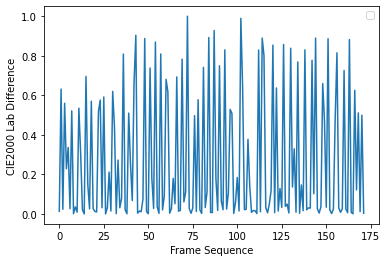

In [29]:
count_frame = i

#CIEDE2000 frame sequence difference 14/03/2021 ORIGINAL PAPER
import cv2
import numpy as np
from skimage import color
#from ciede2000 import CIEDE2000
import math
import time
from matplotlib import pyplot as plt
import numpy as np

def CIEDE2000(Lab_1, Lab_2):
    '''Calculates CIEDE2000 color distance between two CIE L*a*b* colors'''
    C_25_7 = 6103515625 # 25**7
    
    L1, a1, b1 = Lab_1[0], Lab_1[1], Lab_1[2]
    L2, a2, b2 = Lab_2[0], Lab_2[1], Lab_2[2]
    C1 = math.sqrt(a1**2 + b1**2)
    C2 = math.sqrt(a2**2 + b2**2)
    C_ave = (C1 + C2) / 2
    G = 0.5 * (1 - math.sqrt(C_ave**7 / (C_ave**7 + C_25_7)))
    
    L1_, L2_ = L1, L2
    a1_, a2_ = (1 + G) * a1, (1 + G) * a2
    b1_, b2_ = b1, b2
    
    C1_ = math.sqrt(a1_**2 + b1_**2)
    C2_ = math.sqrt(a2_**2 + b2_**2)
    
    if b1_ == 0 and a1_ == 0: h1_ = 0
    elif a1_ >= 0: h1_ = math.atan2(b1_, a1_)
    else: h1_ = math.atan2(b1_, a1_) + 2 * math.pi
    
    if b2_ == 0 and a2_ == 0: h2_ = 0
    elif a2_ >= 0: h2_ = math.atan2(b2_, a2_)
    else: h2_ = math.atan2(b2_, a2_) + 2 * math.pi

    dL_ = L2_ - L1_
    dC_ = C2_ - C1_    
    dh_ = h2_ - h1_
    if C1_ * C2_ == 0: dh_ = 0
    elif dh_ > math.pi: dh_ -= 2 * math.pi
    elif dh_ < -math.pi: dh_ += 2 * math.pi        
    dH_ = 2 * math.sqrt(C1_ * C2_) * math.sin(dh_ / 2)
    
    L_ave = (L1_ + L2_) / 2
    C_ave = (C1_ + C2_) / 2
    
    _dh = abs(h1_ - h2_)
    _sh = h1_ + h2_
    C1C2 = C1_ * C2_
    
    if _dh <= math.pi and C1C2 != 0: h_ave = (h1_ + h2_) / 2
    elif _dh  > math.pi and _sh < 2 * math.pi and C1C2 != 0: h_ave = (h1_ + h2_) / 2 + math.pi
    elif _dh  > math.pi and _sh >= 2 * math.pi and C1C2 != 0: h_ave = (h1_ + h2_) / 2 - math.pi 
    else: h_ave = h1_ + h2_
    
    T = 1 - 0.17 * math.cos(h_ave - math.pi / 6) + 0.24 * math.cos(2 * h_ave) + 0.32 * math.cos(3 * h_ave + math.pi / 30) - 0.2 * math.cos(4 * h_ave - 63 * math.pi / 180)
    
    h_ave_deg = h_ave * 180 / math.pi
    if h_ave_deg < 0: h_ave_deg += 360
    elif h_ave_deg > 360: h_ave_deg -= 360
    dTheta = 30 * math.exp(-(((h_ave_deg - 275) / 25)**2))
    
    R_C = 2 * math.sqrt(C_ave**7 / (C_ave**7 + C_25_7))  
    S_C = 1 + 0.045 * C_ave
    S_H = 1 + 0.015 * C_ave * T
    
    Lm50s = (L_ave - 50)**2
    S_L = 1 + 0.015 * Lm50s / math.sqrt(20 + Lm50s)
    R_T = -math.sin(dTheta * math.pi / 90) * R_C

    k_L, k_C, k_H = 1, 1, 1
    
    f_L = dL_ / k_L / S_L
    f_C = dC_ / k_C / S_C
    f_H = dH_ / k_H / S_H
    
    dE_00 = math.sqrt(f_L**2 + f_C**2 + f_H**2 + R_T * f_C * f_H)
    return dE_00
#start time
start = time.time()
frame = []
labdiff = []
for k in range(0,(count_frame-2)):
  image1 = cv2.imread("/content/data/frames/" + video_id + "/" + str(k) + ".jpg")
  image2 = cv2.imread("/content/data/frames/" + video_id + "/" + str(k+1) + ".jpg")
  image1 = np.float32(image1)
  image1 *= 1./255
  image2 = np.float32(image2)
  image2 *= 1./255

  Lab1 = cv2.cvtColor(image1, cv2.COLOR_BGR2Lab)
  print(Lab1.shape)
  Lab2 = cv2.cvtColor(image2, cv2.COLOR_BGR2Lab)


  L1, a1, b1 = cv2.split(Lab1)
  L2, a2, b2 = cv2.split(Lab2)

#print(np.mean(L1))
#print(a1)
  diff = 0
  for i in range(0,Lab1.shape[0]):
    for j in range(0,Lab1.shape[1]):
      diff = diff + CIEDE2000((L1[i][j], a1[i][j], b1[i][j]), (L2[i][j], a2[i][j], b2[i][j]))
    #print(CIEDE2000((L1[i][j], a1[i][j], b1[i][j]), (L2[i][j], a2[i][j], b2[i][j])))
  print(k)
  print(k+1)
  print(diff/(60*88*3))
  frame.append(k)
  labdiff.append(diff/(60*88*3))
#print(CIEDE2000((50, 2.6772, -79.7751), (50, 0.0000, -82.7485)))


#plt.plot([0.1, 0.2, 0.3, 0.4], [1, 2, 3, 4])
#plt.plot([0.1, 0.2, 0.3, 0.4], [1, 4, 9, 16])
frame = np.array(frame)
labdiff = np.array(labdiff)#*(240*352*3)
labdiff = labdiff/max(labdiff)
print(max(labdiff))
print(labdiff)
plt.plot(frame, (labdiff))#, label='CIEDE2000 Lab Difference')
plt.xlabel("Frame Sequence")
plt.ylabel("CIE2000 Lab Difference")
plt.legend()
#plt.savefig('labdiff.jpeg')
#print(labdiff[11732]*3)
#print(labdiff[11733]*3)
#print(labdiff[11734]*3)

ab_cut = []
ab_cut.append(0)
deli = 0.22
#labdiff = labdiff*max(labdiff)
for i in range(1,len(frame)):
  if(labdiff[i] > deli):
    if(labdiff[i-1] < deli):
      if(labdiff[i+1] < deli):
        ab_cut.append(i)

  

print(len(ab_cut))
print(ab_cut)
#ab_cut = np.array(ab_cut)
#print(ab_cut)
#print(ab_cut[0])




# end time
end = time.time()

# total time taken
print(f"Runtime of the program is {end - start}")




In [40]:
ab_cut = []
ab_cut.append(0)
deli = 0.22
#labdiff = labdiff*max(labdiff)
for i in range(2,len(frame)-1):
  if(labdiff[i] > deli):
    if(labdiff[i-1] < deli):
      if(labdiff[i+1] < deli):
        ab_cut.append(i)

  

print(len(ab_cut))
print(ab_cut)


38
[0, 7, 15, 18, 25, 33, 36, 48, 51, 54, 57, 66, 69, 72, 76, 78, 81, 84, 87, 90, 93, 106, 112, 120, 122, 126, 130, 132, 134, 138, 142, 144, 151, 160, 163, 166, 168, 170]


In [34]:
ab_cut[0]

1

In [41]:
ab_cut = np.array(ab_cut)

category = "Biking"
sbd_frames = []
dir = "/content/data/frames/" + category
for i in range(0,len(ab_cut)):
  #print(scenes[i][1])
  sbd_frames.append(dir + "/" + str(ab_cut[i]) + ".jpg")
  #sbd_frames.append(dir + "/" + str(scenes[i][1]) + ".jpg")

#sbd_frames = np.array(sbd_frames)
print(sbd_frames)

['/content/data/frames/Biking/0.jpg', '/content/data/frames/Biking/7.jpg', '/content/data/frames/Biking/15.jpg', '/content/data/frames/Biking/18.jpg', '/content/data/frames/Biking/25.jpg', '/content/data/frames/Biking/33.jpg', '/content/data/frames/Biking/36.jpg', '/content/data/frames/Biking/48.jpg', '/content/data/frames/Biking/51.jpg', '/content/data/frames/Biking/54.jpg', '/content/data/frames/Biking/57.jpg', '/content/data/frames/Biking/66.jpg', '/content/data/frames/Biking/69.jpg', '/content/data/frames/Biking/72.jpg', '/content/data/frames/Biking/76.jpg', '/content/data/frames/Biking/78.jpg', '/content/data/frames/Biking/81.jpg', '/content/data/frames/Biking/84.jpg', '/content/data/frames/Biking/87.jpg', '/content/data/frames/Biking/90.jpg', '/content/data/frames/Biking/93.jpg', '/content/data/frames/Biking/106.jpg', '/content/data/frames/Biking/112.jpg', '/content/data/frames/Biking/120.jpg', '/content/data/frames/Biking/122.jpg', '/content/data/frames/Biking/126.jpg', '/conten

In [42]:
title = "/content/b1.mp4"
img_array = []
fourcc = cv2.VideoWriter_fourcc('m','p','4','v')
for filename in sbd_frames:
  img = cv2.imread(filename)
  height, width, layers = img.shape
  size = (width,height)
  img_array.append(img)

out = cv2.VideoWriter(title, fourcc, 30, size)
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()

shutil.rmtree("/content/data")



In [1]:
!git clone https://github.com/vkhoi/KTH-Action-Recognition.git

Cloning into 'KTH-Action-Recognition'...
remote: Enumerating objects: 233, done.
remote: Total 233 (delta 0), reused 0 (delta 0), pack-reused 233
Receiving objects: 100% (233/233), 709.16 KiB | 17.30 MiB/s, done.
Resolving deltas: 100% (148/148), done.


In [2]:
%cd /content/KTH-Action-Recognition/dataset

/content/KTH-Action-Recognition/dataset


In [3]:
#for installing rar file
!pip install pyunpack
!pip install patool

     |████████████████████████████████| 77 kB 3.9 MB/s 


In [4]:
from pyunpack import Archive
Archive('Biking.rar').extractall('/content/KTH-Action-Recognition/dataset')
Archive('JumpingJack.rar').extractall('/content/KTH-Action-Recognition/dataset')
Archive('Kayaking.rar').extractall('/content/KTH-Action-Recognition/dataset')
Archive('PlayingGuitar.rar').extractall('/content/KTH-Action-Recognition/dataset')
Archive('Rowing.rar').extractall('/content/KTH-Action-Recognition/dataset')
Archive('Skijet.rar').extractall('/content/KTH-Action-Recognition/dataset')
Archive('TaiChi.rar').extractall('/content/KTH-Action-Recognition/dataset')

!rm *.rar

Processing category Biking
Creating...data/frames/Biking/0.jpg
Creating...data/frames/Biking/1.jpg
Creating...data/frames/Biking/2.jpg
Creating...data/frames/Biking/3.jpg
Creating...data/frames/Biking/4.jpg
Creating...data/frames/Biking/5.jpg
Creating...data/frames/Biking/6.jpg
Creating...data/frames/Biking/7.jpg
Creating...data/frames/Biking/8.jpg
Creating...data/frames/Biking/9.jpg
Creating...data/frames/Biking/10.jpg
Creating...data/frames/Biking/11.jpg
Creating...data/frames/Biking/12.jpg
Creating...data/frames/Biking/13.jpg
Creating...data/frames/Biking/14.jpg
Creating...data/frames/Biking/15.jpg
Creating...data/frames/Biking/16.jpg
Creating...data/frames/Biking/17.jpg
Creating...data/frames/Biking/18.jpg
Creating...data/frames/Biking/19.jpg
Creating...data/frames/Biking/20.jpg
Creating...data/frames/Biking/21.jpg
Creating...data/frames/Biking/22.jpg
Creating...data/frames/Biking/23.jpg
Creating...data/frames/Biking/24.jpg
Creating...data/frames/Biking/25.jpg
Creating...data/frame

No handles with labels found to put in legend.


237
238
0.26400459767555523
1.0
[1.08416946e-02 4.95484525e-01 1.87812924e-02 4.39059292e-01
 1.79327429e-01 2.63838184e-01 2.12675239e-02 4.08824673e-01
 1.42639170e-03 2.83206307e-02 7.37037914e-03 4.19508273e-01
 2.39330775e-01 1.65848775e-02 5.70655549e-04 5.45740341e-01
 1.18491781e-01 2.01513652e-02 4.47274087e-01 2.18765477e-02
 1.00485624e-02 8.40462670e-03 4.06192167e-01 4.51710301e-01
 2.48259072e-02 4.63957051e-01 4.66192938e-04 2.54945734e-02
 1.65928648e-01 1.18173941e-02 4.86135047e-01 3.46145961e-01
 1.52126085e-03 2.14032749e-01 2.49605706e-02 6.24831627e-02
 6.34303328e-01 1.70396281e-02 9.63293453e-04 4.00107751e-01
 1.99197722e-01 5.35422001e-02 5.21027321e-01 7.08606885e-01
 3.60305619e-03 1.19509690e-02 9.27376235e-03 5.89938163e-02
 6.96038779e-01 9.82639043e-03 1.21269825e-03 5.78898374e-01
 1.40965994e-01 2.21591792e-02 6.81834139e-01 2.92364682e-02
 2.56074300e-03 6.34632460e-01 1.63222267e-02 7.24105189e-02
 5.33766676e-01 4.84752890e-01 3.32222821e-03 2.14304

No handles with labels found to put in legend.


148
149
20.633509912793055
1.0
[0.2192754  0.18914556 0.19959254 0.29154095 0.19815431 0.3059257
 0.311771   0.29098602 0.27257091 0.22527679 0.25133266 0.36665209
 0.2164681  0.23264373 0.24017599 0.31657765 0.32998279 0.35232513
 0.29732641 0.38135999 0.48795761 0.41559758 0.36934065 0.55367738
 0.41713132 0.36405751 0.36849352 0.42386773 0.49180902 0.52566329
 0.45384175 0.41825786 0.4095386  0.43315121 0.44291151 0.59582785
 0.4358384  0.42679539 0.43323357 0.48250178 0.4971768  0.53054429
 0.71390122 0.64757228 0.6064862  0.62408969 0.48756419 0.67656824
 0.57591257 0.58862539 0.60600604 0.62702503 0.56932135 0.57002184
 0.48965765 0.53372348 0.6441902  0.5872161  0.46811083 0.62380814
 0.41796409 0.50812549 0.42760619 0.42507157 0.4663412  0.54332021
 0.5721235  0.52385581 0.5212461  0.57552034 0.51411261 0.67431201
 0.49685084 0.41764401 0.43719594 0.46146763 0.50536208 0.58468796
 0.50669264 0.40224436 0.3974917  0.42967058 0.68214639 1.
 0.80089327 0.72639298 0.54310769 0.5077

No handles with labels found to put in legend.


148
149
23.2287067310363
1.0
[0.43265733 0.41280294 0.40173363 0.42578275 0.413022   0.38609699
 0.37145319 0.36442464 0.37546335 0.35443495 0.35941485 0.5969267
 0.36960899 0.43004117 0.44029437 0.4326743  0.45556297 0.39866378
 0.41064316 0.43534115 0.35133368 0.34169737 0.44410291 0.69054774
 0.37112796 0.34093281 0.39323292 0.4687014  0.52148601 0.41349498
 0.34729473 0.43317139 0.45677099 0.42422628 0.56412076 0.73457001
 0.42775328 0.32883697 0.39571432 0.4753186  0.39229435 0.3786282
 0.36683865 0.39237146 0.39057194 0.45661211 0.44504094 0.72235431
 0.54286569 0.58126949 0.56345036 0.51412588 0.46599658 0.45105328
 0.42556974 0.47360455 0.44557252 0.43790058 0.53794449 0.76668836
 0.63021104 0.60828318 0.63412365 0.59793182 0.66591923 0.66442436
 0.6839866  0.66095867 0.65077069 0.59790106 0.59412283 0.91027452
 0.55243084 0.5401598  0.56165773 0.5405599  0.56919066 0.58001654
 0.56323668 0.53770494 0.52775957 0.52872823 0.57613264 0.95572155
 0.55811062 0.56421029 0.58148354 0

No handles with labels found to put in legend.


237
238
0.49993495611362854
1.0
[8.06325447e-01 6.71684960e-01 1.99244193e-02 3.74498411e-01
 1.93423371e-02 3.52244032e-03 6.78923594e-01 1.55248886e-01
 2.36408210e-02 3.95093395e-01 1.74027182e-02 4.60045192e-01
 1.89115897e-02 6.09940617e-01 1.48107356e-03 1.90675958e-02
 2.89275371e-03 5.94822381e-01 3.62589781e-01 1.85516160e-01
 1.83832257e-03 2.17128690e-02 3.45691149e-01 8.97497017e-02
 3.87281149e-01 1.31402101e-02 7.79083479e-03 2.07724384e-02
 5.26836609e-01 2.64855290e-02 4.04177956e-01 2.88543708e-01
 1.93672665e-03 3.37010789e-02 1.63736228e-02 4.75508598e-01
 2.55069860e-02 3.28943335e-01 1.18380899e-03 2.80451013e-01
 2.16429059e-02 3.59361812e-02 3.43703601e-01 1.75880346e-01
 1.83451596e-03 3.84905138e-01 1.27588312e-02 4.90863165e-01
 1.80329069e-02 6.10378810e-01 1.67523617e-03 1.77943162e-02
 3.48580289e-03 7.87908581e-01 1.58791965e-02 4.34692576e-01
 1.76407235e-03 4.84033672e-01 2.81284765e-02 9.82866929e-02
 7.05591967e-01 1.56972739e-02 1.34576939e-03 4.63217

No handles with labels found to put in legend.


60
61
12.193932254421055
1.0
[0.29342602 0.15391508 0.32954351 0.43668968 0.51305215 0.59408988
 0.6175244  0.63632235 0.62727566 0.64550694 0.71521538 0.98538878
 0.63023771 0.78000324 0.56214847 0.62208626 0.43772844 0.32891579
 0.43236193 0.51073786 0.53452523 0.58400278 0.59557759 0.97533696
 0.56922265 0.6086963  0.73693442 0.74811461 0.65258043 0.51803403
 0.42924094 0.23361085 0.27667893 0.33675875 0.42800762 0.82183733
 0.58364123 0.61907823 0.61162323 0.62894208 0.65640599 0.70596329
 0.67417071 0.66454319 0.63000609 0.55062876 0.58452577 0.70916191
 0.35537911 0.49694679 0.55810587 0.59494311 0.57877866 0.62638395
 0.64112317 0.6604089  0.63529824 0.70526928 0.68622888 1.
 0.4560528 ]
1
[0]
['/content/KTH-Action-Recognition/dataset/data/frames/JumpingJack/0.jpg']
Creating...data/frames/JumpingJack/0.jpg
Creating...data/frames/JumpingJack/1.jpg
Creating...data/frames/JumpingJack/2.jpg
Creating...data/frames/JumpingJack/3.jpg
Creating...data/frames/JumpingJack/4.jpg
Creating...

No handles with labels found to put in legend.


88
89
4.477556359206092
1.0
[0.2096799  0.39746566 0.43358021 0.60142208 0.59810123 0.52834663
 0.57026749 0.53403035 0.55226666 0.54754459 0.75912481 0.88261758
 0.51740872 0.51868621 0.37773253 0.20766342 0.38428741 0.47547956
 0.48718194 0.49301513 0.54569398 0.82650748 0.53767865 0.9575656
 0.52394313 0.55726708 0.5572524  0.49336395 0.68723447 0.32143269
 0.1922765  0.28383786 0.38409059 0.49325335 0.74837231 1.
 0.53882172 0.51651378 0.52016198 0.75548692 0.50990631 0.51652503
 0.49558717 0.50047243 0.41236825 0.19473938 0.43691675 0.86283921
 0.45640846 0.72301635 0.49672841 0.53610244 0.52210068 0.5696205
 0.49566396 0.533788   0.53104148 0.55967542 0.42950357 0.77525654
 0.2016717  0.54728642 0.33554921 0.48568441 0.59413447 0.54934793
 0.52285061 0.50165113 0.57572161 0.53801796 0.51418836 0.89924578
 0.69510905 0.47475455 0.3649421  0.16556573 0.36923166 0.3988256
 0.4284737  0.46726393 0.48925072 0.54206434 0.50434106 0.83835766
 0.49041749 0.52750073 0.55010972 0.48948069 

No handles with labels found to put in legend.


60
61
9.640528618711617
1.0
[0.1963084  0.34944705 0.47528229 0.60323833 0.63654427 0.64110965
 0.55045349 0.6216634  0.66266893 0.65594693 0.63939366 1.
 0.54222057 0.52502003 0.43055144 0.21789045 0.42220941 0.55591771
 0.51893294 0.54788749 0.57417496 0.62152254 0.63637982 0.92834162
 0.64041642 0.66402627 0.57970538 0.48139321 0.44000435 0.30786021
 0.23734456 0.30965961 0.39926225 0.6542188  0.549817   0.8855851
 0.54673725 0.56217758 0.60518266 0.67038143 0.69525908 0.65360789
 0.64001257 0.55876631 0.49070303 0.36870457 0.32983059 0.77808232
 0.53987133 0.57700199 0.59896336 0.57516849 0.58652996 0.59275044
 0.62328191 0.62647725 0.7037474  0.6361852  0.58486047 0.85767224
 0.34775117]
1
[0]
['/content/KTH-Action-Recognition/dataset/data/frames/JumpingJack/0.jpg']
Creating...data/frames/JumpingJack/0.jpg
Creating...data/frames/JumpingJack/1.jpg
Creating...data/frames/JumpingJack/2.jpg
Creating...data/frames/JumpingJack/3.jpg
Creating...data/frames/JumpingJack/4.jpg
Creating...da

No handles with labels found to put in legend.


90
91
5.129746969564499
1.0
[0.16479076 0.23184433 0.21188076 0.32454202 0.43186661 0.55350682
 0.56726223 0.56880734 0.76047144 0.47508015 0.52892383 1.
 0.50325881 0.50156661 0.47944103 0.47990477 0.43113317 0.2538238
 0.30108552 0.38872968 0.6579534  0.50662912 0.51572822 0.96772056
 0.77355017 0.48684514 0.45507025 0.49890412 0.51889645 0.46923862
 0.4318446  0.34520263 0.35331845 0.28977536 0.3929794  0.82069341
 0.55017049 0.53974123 0.54768333 0.47255511 0.49897529 0.55628416
 0.50932618 0.53460276 0.52920255 0.50119014 0.51246745 0.73425974
 0.26489386 0.65093346 0.42090456 0.4353725  0.4732317  0.5525901
 0.51700201 0.5044282  0.54456309 0.50377814 0.52146101 0.90444536
 0.48753129 0.69680383 0.27481463 0.19883445 0.32499718 0.4571546
 0.52322594 0.60526654 0.59288448 0.62659109 0.53884562 0.93624006
 0.53009318 0.56000674 0.60660755 0.51747898 0.49961392 0.47902115
 0.19391735 0.36567179 0.46278038 0.45362297 0.49745083 0.93701173
 0.76753918 0.5242394  0.48509419 0.50843687 

No handles with labels found to put in legend.


195
196
24.46039935396071
1.0
[0.24499918 0.23638217 0.26626437 0.27910621 0.25203875 0.21387148
 0.2735125  0.25132975 0.21134047 0.23228161 0.17295813 0.36275782
 0.20151394 0.21620619 0.21244748 0.21118451 0.17271246 0.25693803
 0.29020231 0.27683775 0.22959474 0.34226144 0.23537027 0.30521299
 0.1728042  0.32518582 0.2509255  0.2436096  0.19680687 0.23871567
 0.44765938 0.39076828 0.33112558 0.19286028 0.21851788 0.40939468
 0.27258126 0.31273982 0.18028897 0.27336066 0.31439502 0.34052386
 0.37050564 0.3377874  0.27961725 0.31525454 0.3075845  0.46733448
 0.36026419 0.30415417 0.23450923 0.26575201 0.20615849 0.29438739
 0.32669237 0.31683269 0.28366957 0.26365218 0.24570574 0.40036889
 0.23247392 0.23608019 0.24329657 0.28104709 0.34022446 0.34945252
 0.3308696  0.382191   0.35943304 0.30851755 0.25993669 0.38371027
 0.29719594 0.27343238 0.27875937 0.29691238 0.27740265 0.29199114
 0.2424275  0.27453374 0.46603454 0.23679186 0.28801127 0.36315324
 0.20081126 0.21171374 0.2007317

No handles with labels found to put in legend.


211
212
18.26597258487086
1.0
[0.26210604 0.21907024 0.35266155 0.34547537 0.38335049 0.4183023
 0.3660662  0.32719682 0.37162311 0.32373561 0.32402567 0.42866638
 0.31668431 0.31056841 0.33495665 0.25554508 0.28638836 0.3399063
 0.33651504 0.47054962 0.39042683 0.26632166 0.36387948 0.50350055
 0.37710104 0.39596703 0.33214594 0.25809278 0.32269536 0.23812117
 0.3148202  0.31797209 0.26625827 0.28855216 0.27195409 0.46431845
 0.30757396 0.27565999 0.25945883 0.25887864 0.35433251 0.33277097
 0.54032429 0.35372436 0.28024912 0.35212759 0.28684608 0.44965086
 0.28832539 0.32928145 0.35431583 0.41183201 0.38808337 0.43300448
 0.44479191 0.36967167 0.42350082 0.30537371 0.34032466 0.49369839
 0.32784701 0.31089612 0.4791348  0.43024258 0.39597723 0.35547031
 0.04579526 0.30763992 0.07793677 0.44345211 0.09965686 0.53103952
 0.12502933 0.42318037 0.06051328 0.37425142 0.0955463  0.5281851
 0.11579058 0.61735324 0.12245365 0.64645902 0.07965167 0.81243776
 0.06765754 0.78467323 0.07831881 0

IndexError: ignored

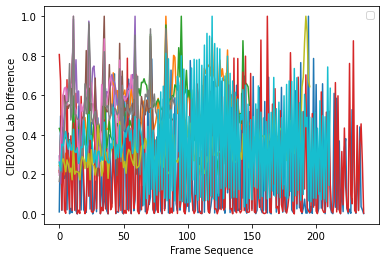

In [5]:
#VIDEO SUMMARIZATION BY CHAKRABORTY et.al and getting summarized videos
#CIEDE2000 frame sequence difference 14/03/2021 ORIGINAL PAPER
import cv2
import numpy as np
from skimage import color
#from ciede2000 import CIEDE2000
import math
import time
from matplotlib import pyplot as plt
import numpy as np

def CIEDE2000(Lab_1, Lab_2):
    '''Calculates CIEDE2000 color distance between two CIE L*a*b* colors'''
    C_25_7 = 6103515625 # 25**7
    
    L1, a1, b1 = Lab_1[0], Lab_1[1], Lab_1[2]
    L2, a2, b2 = Lab_2[0], Lab_2[1], Lab_2[2]
    C1 = math.sqrt(a1**2 + b1**2)
    C2 = math.sqrt(a2**2 + b2**2)
    C_ave = (C1 + C2) / 2
    G = 0.5 * (1 - math.sqrt(C_ave**7 / (C_ave**7 + C_25_7)))
    
    L1_, L2_ = L1, L2
    a1_, a2_ = (1 + G) * a1, (1 + G) * a2
    b1_, b2_ = b1, b2
    
    C1_ = math.sqrt(a1_**2 + b1_**2)
    C2_ = math.sqrt(a2_**2 + b2_**2)
    
    if b1_ == 0 and a1_ == 0: h1_ = 0
    elif a1_ >= 0: h1_ = math.atan2(b1_, a1_)
    else: h1_ = math.atan2(b1_, a1_) + 2 * math.pi
    
    if b2_ == 0 and a2_ == 0: h2_ = 0
    elif a2_ >= 0: h2_ = math.atan2(b2_, a2_)
    else: h2_ = math.atan2(b2_, a2_) + 2 * math.pi

    dL_ = L2_ - L1_
    dC_ = C2_ - C1_    
    dh_ = h2_ - h1_
    if C1_ * C2_ == 0: dh_ = 0
    elif dh_ > math.pi: dh_ -= 2 * math.pi
    elif dh_ < -math.pi: dh_ += 2 * math.pi        
    dH_ = 2 * math.sqrt(C1_ * C2_) * math.sin(dh_ / 2)
    
    L_ave = (L1_ + L2_) / 2
    C_ave = (C1_ + C2_) / 2
    
    _dh = abs(h1_ - h2_)
    _sh = h1_ + h2_
    C1C2 = C1_ * C2_
    
    if _dh <= math.pi and C1C2 != 0: h_ave = (h1_ + h2_) / 2
    elif _dh  > math.pi and _sh < 2 * math.pi and C1C2 != 0: h_ave = (h1_ + h2_) / 2 + math.pi
    elif _dh  > math.pi and _sh >= 2 * math.pi and C1C2 != 0: h_ave = (h1_ + h2_) / 2 - math.pi 
    else: h_ave = h1_ + h2_
    
    T = 1 - 0.17 * math.cos(h_ave - math.pi / 6) + 0.24 * math.cos(2 * h_ave) + 0.32 * math.cos(3 * h_ave + math.pi / 30) - 0.2 * math.cos(4 * h_ave - 63 * math.pi / 180)
    
    h_ave_deg = h_ave * 180 / math.pi
    if h_ave_deg < 0: h_ave_deg += 360
    elif h_ave_deg > 360: h_ave_deg -= 360
    dTheta = 30 * math.exp(-(((h_ave_deg - 275) / 25)**2))
    
    R_C = 2 * math.sqrt(C_ave**7 / (C_ave**7 + C_25_7))  
    S_C = 1 + 0.045 * C_ave
    S_H = 1 + 0.015 * C_ave * T
    
    Lm50s = (L_ave - 50)**2
    S_L = 1 + 0.015 * Lm50s / math.sqrt(20 + Lm50s)
    R_T = -math.sin(dTheta * math.pi / 90) * R_C

    k_L, k_C, k_H = 1, 1, 1
    
    f_L = dL_ / k_L / S_L
    f_C = dC_ / k_C / S_C
    f_H = dH_ / k_H / S_H
    
    dE_00 = math.sqrt(f_L**2 + f_C**2 + f_H**2 + R_T * f_C * f_H)
    return dE_00


import cv2
import numpy as np
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["axes.grid"] = False
import glob
import cv2
import os

from sklearn.cluster import KMeans, spectral_clustering
from sklearn.metrics import silhouette_score, pairwise_distances_argmin_min
from scipy.signal import find_peaks

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

import tensorflow as tf
import shutil

def sort_frames(list_of_frames, video_id):
    return sorted(list_of_frames, key=lambda x: int(x.split(f'data/frames/{video_id}/')[1].split('.jpg')[0]))

def get_image_features(frames_filepaths):
  image_features = []
  model = VGG16(weights='imagenet', include_top=False)
  for img_path in frames_filepaths:
      print(img_path)
      img = image.load_img(img_path, target_size=(224, 224))
      img_data = image.img_to_array(img)
      img_data = np.expand_dims(img_data, axis=0)
      img_data = preprocess_input(img_data)

      vgg16_feature = model.predict(img_data)
      image_features.append(np.array(vgg16_feature).flatten())
  return image_features

def kmeans(image_features, n_clusters):
  silhouette = np.zeros(n_clusters)
  for k in range(2, n_clusters):
    kmeans = KMeans(n_clusters=k).fit_predict(image_features)
    silhouette[k] = silhouette_score(image_features, kmeans)
    print(f'{k} cluster complete')
  return silhouette

def random_frame_idxs_for_cluster(kmeans_labels):
  idxs = []
  for label in range(len(np.unique(kmeans_labels))):
    idxs.append(np.random.choice(np.argwhere(kmeans_labels == label).flatten(), 1)[0])
  return np.sort(np.array(idxs))

def closest_to_centroid_frames(kmeans, image_list, image_features):
  closest, _ = pairwise_distances_argmin_min(
      kmeans.cluster_centers_, image_features)
  return np.array(image_list)[closest]

def create_video_from_frames(frames, title, fps=30, fourcc=cv2.VideoWriter_fourcc('m','p','4','v')):
    img_array = []
    for filename in frames:
        img = cv2.imread(filename)
        height, width, layers = img.shape
        size = (width,height)
        img_array.append(img)

    out = cv2.VideoWriter(title, fourcc, 30, size)
    for i in range(len(img_array)):
        out.write(img_array[i])
    out.release()



CATEGORIES = ["Biking", "JumpingJack", "Kayaking", "PlayingGuitar", "Rowing", "Skijet", "TaiChi"]#, "handwaving"]#, "jogging", "running", 
   # "walking"]

if __name__ == "__main__":

    # Create directory to store extracted pixel features.
    os.makedirs("data", exist_ok=True)

    
    n_processed_files = 0
    features = []

    for category in CATEGORIES:
        print("Processing category %s" % category)
        cou = 0
        # Get all files in current category's folder.
        folder_path = os.path.join("..", "dataset", category)
        filenames = os.listdir(folder_path)

        # List to store features. features[i] stores features for the i-th video
        # in current category.
        #features = []

        for filename in filenames:
            filepath = os.path.join("..", "dataset", category, filename)
            path = "/content/KTH-Action-Recognition/dataset/" + category + "/" + filename
            video_id = category
            cou = cou + 1
            video = filepath
            video_capture = cv2.VideoCapture(video)
            currentframe = 0
            try: 
              if not os.path.exists(f'data/frames/{video_id}'): 
                os.makedirs(f'data/frames/{video_id}') 
            except OSError: 
              print ('Error: Creating directory of data')
            while(True): 
              ret, frame = video_capture.read() 
              if ret: 
                name = f'data/frames/{video_id}/' + str(currentframe) + '.jpg'
                print ('Creating...' + name) 
                cv2.imwrite(name, frame) 
                currentframe += 1
              else: 
                break
            video_capture.release() 
            cv2.destroyAllWindows()

            ###INSERT CODE HERE
            count_frame = currentframe
            frame = []
            labdiff = []
            for k in range(0,(count_frame-2)):
              image1 = cv2.imread("/content/KTH-Action-Recognition/dataset/data/frames/" + video_id + "/" + str(k) + ".jpg")
              image2 = cv2.imread("/content/KTH-Action-Recognition/dataset/data/frames/" + video_id + "/" + str(k+1) + ".jpg")
              image1 = np.float32(image1)
              image1 *= 1./255
              image2 = np.float32(image2)
              image2 *= 1./255

              Lab1 = cv2.cvtColor(image1, cv2.COLOR_BGR2Lab)
              print(Lab1.shape)
              Lab2 = cv2.cvtColor(image2, cv2.COLOR_BGR2Lab)


              L1, a1, b1 = cv2.split(Lab1)
              L2, a2, b2 = cv2.split(Lab2)

            #print(np.mean(L1))
            #print(a1)
              diff = 0
              for i in range(0,Lab1.shape[0]):
                for j in range(0,Lab1.shape[1]):
                  diff = diff + CIEDE2000((L1[i][j], a1[i][j], b1[i][j]), (L2[i][j], a2[i][j], b2[i][j]))
                #print(CIEDE2000((L1[i][j], a1[i][j], b1[i][j]), (L2[i][j], a2[i][j], b2[i][j])))
              print(k)
              print(k+1)
              print(diff/(60*88*3))
              frame.append(k)
              labdiff.append(diff/(60*88*3))
            #print(CIEDE2000((50, 2.6772, -79.7751), (50, 0.0000, -82.7485)))


            #plt.plot([0.1, 0.2, 0.3, 0.4], [1, 2, 3, 4])
            #plt.plot([0.1, 0.2, 0.3, 0.4], [1, 4, 9, 16])
            frame = np.array(frame)
            labdiff = np.array(labdiff)#*(240*352*3)
            labdiff = labdiff/max(labdiff)
            print(max(labdiff))
            print(labdiff)
            plt.plot(frame, (labdiff))#, label='CIEDE2000 Lab Difference')
            plt.xlabel("Frame Sequence")
            plt.ylabel("CIE2000 Lab Difference")
            plt.legend()
            #plt.savefig('labdiff.jpeg')
            #print(labdiff[11732]*3)
            #print(labdiff[11733]*3)
            #print(labdiff[11734]*3)

            ab_cut = []
            ab_cut.append(0)
            deli = 0.22
            #labdiff = labdiff*max(labdiff)
            for i in range(1,len(frame)):
              if(labdiff[i] > deli):
                if(labdiff[i-1] < deli):
                  if(labdiff[i+1] < deli):
                    ab_cut.append(i)

              

            print(len(ab_cut))
            print(ab_cut)



            
            
            sbd_frames = []
            dir = "/content/KTH-Action-Recognition/dataset/data/frames/" + category
            for i in range(0,len(ab_cut)):
  
              sbd_frames.append(dir + "/" + str(ab_cut[i]) + ".jpg")

            #sbd_frames = np.array(sbd_frames)
            print(sbd_frames)


            
            #original_frames = sbd_frames
            try: 
              if not os.path.exists(f'dataset/new/{video_id}'): 
                os.makedirs(f'dataset/new/{video_id}')
                 
                
            except OSError: 
              print ('Error: Creating directory of data')
            #create_video_from_frames(original_frames, '/content/KTH-Action-Recognition/dataset/dataset/new/'+ video_id + '/' + category + str(cou)+'.mp4')
            title = '/content/KTH-Action-Recognition/dataset/dataset/new/'+ video_id + '/' + category + str(cou)+'.mp4'
            img_array = []
            fourcc = cv2.VideoWriter_fourcc('m','p','4','v')
            for filename in sbd_frames:
              img = cv2.imread(filename)
              height, width, layers = img.shape
              size = (width,height)
              img_array.append(img)

            out = cv2.VideoWriter(title, fourcc, 30, size)
            for i in range(len(img_array)):
                out.write(img_array[i])
            out.release()

            shutil.rmtree(f'/content/KTH-Action-Recognition/dataset/data/frames/{video_id}')


            n_processed_files += 1
            if n_processed_files % 30 == 0:
                print("Done %d files" % n_processed_files)

        # Dump data to file.
#pickle.dump(features, open("data/pixel.p" , "wb"))
